# The Sparks Foundation 
   <b> GRIP Program
   

#  Task 2:- Predicting the clusters and Visualization.

# Clustering:- 
<b>As the name suggest clustering means to form different clusters(groups) based on the features of the dataset, there are many clustering algorithms in Machine Learning. 

<b>Importing the libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

<b> loading the dataset

In [40]:
df=pd.read_csv('Iris.csv')

In [41]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [43]:
pd.value_counts(df.Species)

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

<b>above shown details are of number of species in the label.

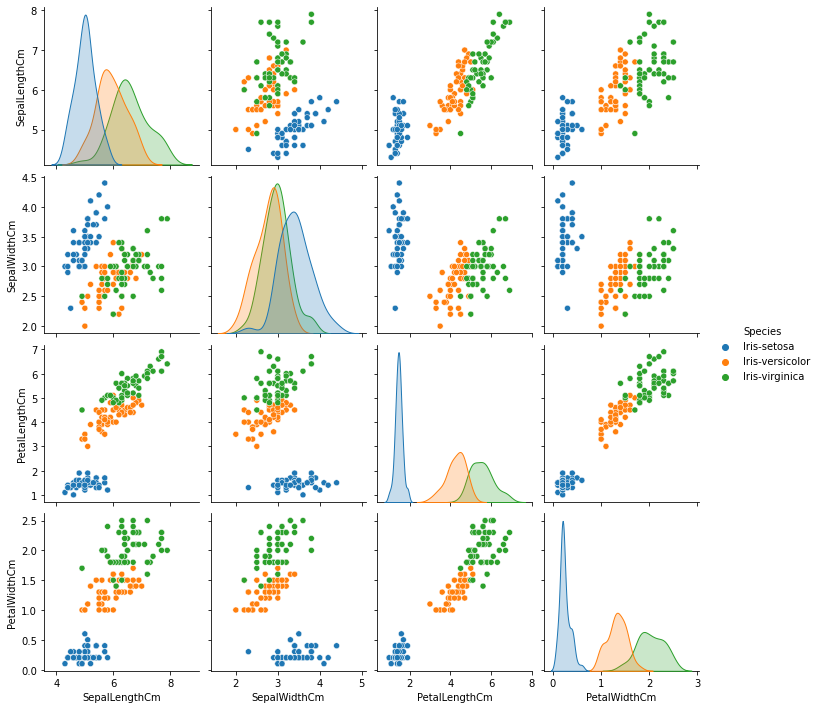

In [44]:
df.drop('Id',axis=1,inplace=True)
sns.pairplot(df,hue='Species')

<b> the pair plot shows the species distribution over different features of the dataset

# K Means Clustering

In [45]:
from sklearn.cluster import KMeans

In [46]:
x = df.iloc[:, [0, 1, 2, 3]].values

<b> finding the optimum value of k

In [47]:
data = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    data.append(kmeans.inertia_)

<b> we can decide the value of k through elbow method

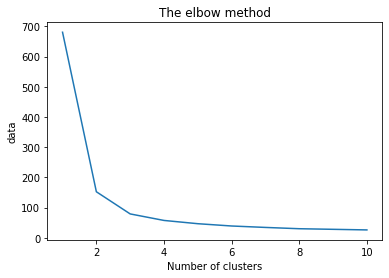

In [48]:
plt.plot(range(1, 11), data)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('data') 
plt.show()

<b> the line in the graph started flattening out at 3 thus taking k=3

In [49]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)


# predicting the model

In [50]:
pred_kmeans = kmeans.fit_predict(x)

# visualization

# 2D

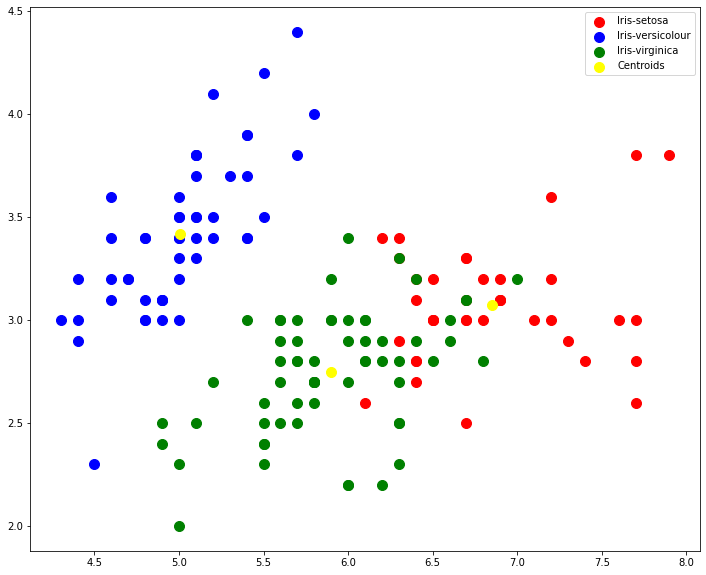

In [55]:
plt.figure(figsize=(12,10))
plt.scatter(x[pred_kmeans == 0, 0], x[pred_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred_kmeans == 1, 0], x[pred_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred_kmeans == 2, 0], x[pred_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# 3D

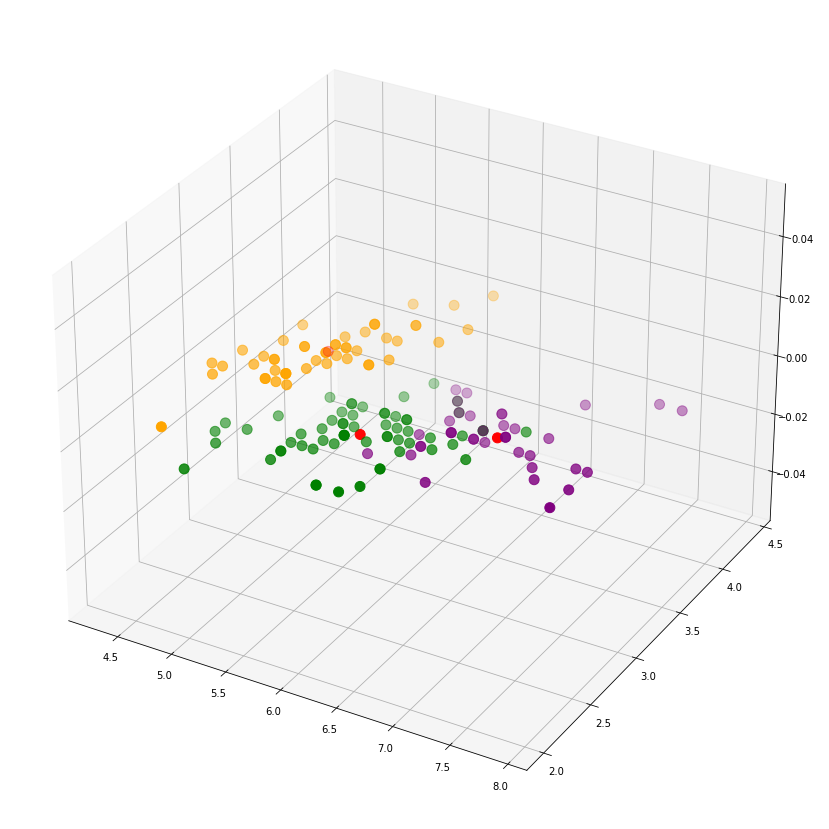

In [52]:
 #3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[pred_kmeans == 0, 0], x[pred_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[pred_kmeans == 1, 0], x[pred_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[pred_kmeans == 2, 0], x[pred_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()